<a href="https://colab.research.google.com/github/Finardiprof/Python/blob/main/Fifa_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WELCOME TO THE NOTEBOOK
------------------------------
## Task 1

### Importing the modules

In [40]:
import numpy as np
import pandas as pd
from google.colab import drive
import plotly.graph_objects as go
import plotly.express as px
import plotly
import re
print('modules are imported')

modules are imported


### let's load the fifa 2020 dataset

In [41]:
drive.mount('/content/drive')
#df_20 = pd.read_csv('/content/drive/My Drive/players_20.csv')
df_20 = pd.read_csv('/content/drive/My Drive/players_23.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


let's check the dataset

In [42]:
df_20.head()

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21


checking how many rows and columns we have

In [43]:
df_20.shape

(18539, 89)

let's check the columns

In [44]:
colonne = list(df_20.columns)
print(colonne)

['Known As', 'Full Name', 'Overall', 'Potential', 'Value(in Euro)', 'Positions Played', 'Best Position', 'Nationality', 'Image Link', 'Age', 'Height(in cm)', 'Weight(in kg)', 'TotalStats', 'BaseStats', 'Club Name', 'Wage(in Euro)', 'Release Clause', 'Club Position', 'Contract Until', 'Club Jersey Number', 'Joined On', 'On Loan', 'Preferred Foot', 'Weak Foot Rating', 'Skill Moves', 'International Reputation', 'National Team Name', 'National Team Image Link', 'National Team Position', 'National Team Jersey Number', 'Attacking Work Rate', 'Defensive Work Rate', 'Pace Total', 'Shooting Total', 'Passing Total', 'Dribbling Total', 'Defending Total', 'Physicality Total', 'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Aggression', 'Interceptions', 'Positioning', 'Visio

Analisi Dati

In [45]:
df_20.describe()

,Overall,Potential,Value(in Euro),Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Wage(in Euro),Release Clause,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
count,18539.000000,18539.000000,1.853900e+04,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,1.853900e+04,...,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000
mean,65.852042,71.016668,2.875461e+06,25.240412,181.550839,75.173904,1602.114569,357.946221,8824.537462,5.081688e+06,...,58.451319,57.374076,58.451319,56.281569,55.928583,56.281569,55.650251,54.528184,55.650251,23.257134
std,6.788353,6.192866,7.635129e+06,4.718163,6.858097,7.013593,273.160237,39.628259,19460.531154,1.467203e+07,...,13.987122,13.171194,13.987122,13.903836,13.872190,13.903836,14.159466,14.743929,14.159466,15.108925
min,47.000000,48.000000,0.000000e+00,16.000000,155.000000,49.000000,759.000000,224.000000,0.000000,0.000000e+00,...,18.000000,18.000000,18.000000,17.000000,19.000000,17.000000,17.000000,18.000000,17.000000,10.000000
25%,62.000000,67.000000,4.750000e+05,21.000000,177.000000,70.000000,1470.000000,331.000000,1000.000000,6.650000e+05,...,54.000000,53.000000,54.000000,51.000000,48.000000,51.000000,49.000000,45.000000,49.000000,17.000000
50%,66.000000,71.000000,1.000000e+06,25.000000,182.000000,75.000000,1640.000000,358.000000,3000.000000,1.500000e+06,...,62.000000,60.000000,62.000000,59.000000,59.000000,59.000000,59.000000,58.000000,59.000000,18.000000
75%,70.000000,75.000000,2.000000e+06,29.000000,186.000000,80.000000,1786.000000,385.000000,8000.000000,3.400000e+06,...,67.000000,66.000000,67.000000,66.000000,66.000000,66.000000,65.000000,66.000000,65.000000,20.000000
max,91.000000,95.000000,1.905000e+08,44.000000,206.000000,105.000000,2312.000000,502.000000,450000.000000,3.667000e+08,...,92.000000,91.000000,92.000000,88.000000,89.000000,88.000000,87.000000,90.000000,87.000000,90.000000


In [47]:
(df_20.Age == 30).describe()

count     18539
unique        2
top       False
freq      17569
Name: Age, dtype: object

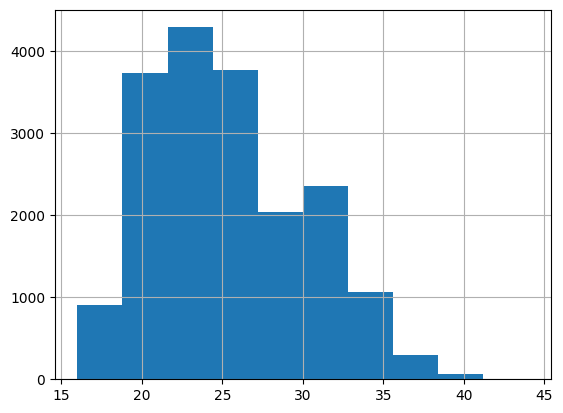

In [48]:
histogram = df_20.Age.hist()

In [54]:
peso = df_20.weight_kg.hist()
df_20.weight_kg.describe()

SyntaxError: ignored

## Task 2:
### Data Preprocessin
Dropping some useless columns

In [ ]:
useless_columns = ['dob','sofifa_id', 'player_url', 'long_name', 'body_type', 'real_face', 'loaned_from', 'nation_position', 'nation_jersey_number']

Let's check the dataframe again

### Calculating BMI
let's calculate body max index of each Player

### Player's Position
Convert the categorical values in Player's Position column in integer values.

In [ ]:
df_20[['short_name','player_positions']]

,short_name,player_positions
0,L. Messi,"RW, CF, ST"
1,Cristiano Ronaldo,"ST, LW"
2,Neymar Jr,"LW, CAM"
3,J. Oblak,GK
4,E. Hazard,"LW, CF"
...,...,...
18273,Shao Shuai,CB
18274,Xiao Mingjie,CB
18275,Zhang Wei,CM
18276,Wang Haijian,CM


let's convert the column to integeral columns

concatinating new_player_position dataframe to our dataframe

let's check the dataset again

let's drop the original player_positions columns

let's check the dataset again

## Task 3:
### Position Columns ratings
Clean, Process and Assign the new attributes to columns listed below.

In [ ]:
columns = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram',
       'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb',
       'lcb', 'cb', 'rcb', 'rb']

let's check what we have in these columns

let's omit the '+' sign

Let's Replace NaN values with 0

Let's convert the columns to int

Checking the dataframe again

### Filling Missing Values
Let's fill <b>"dribbling", "defending", "physic", "passing", "shooting" and "pace" </b> missing values of these columns by median


In [ ]:
columns = ["dribbling", "defending", "physic", "passing", "shooting", "pace"]

At first let's check how many NaN values are there in these columuns

now lets fill the NaN values with the median of the respective column

let's fill all NaN values in the dataframe with 0

let's count the NaN values again

## Task 4:
## Exploratory Data Analysis

#### 1- Scatter Plot (colored by Age) year 2020 - Overall Rating vs Value in Euros

In [51]:
figura = go.Figure(
data = go.Scatter(
        x = df_20['overall'],
        y = df_20['value_eur'],
        mode = 'markers',
        marker = dict(
        size = 10,
        color = df_20['age'],
        showscale = True,
        ),
        text = df_20['short_name']
)
)
figura.update_layout(title= 'Scatter Plot (colori per età - Rating vs Euro )',
xaxis_title = 'a', yaxis_title = 'b')
figura.show()


KeyError: ignored

#### 2- Pie chart proportion of right-foot players vs left-foot players

In [27]:
fig = px.pie(df_20, names = 'preferred_foot', title = 'a')
fig.show()

fig = px.pie(df_20, names = 'age', title = 'a')
fig.show()

#### 3- Histogram of Players Ages

In [31]:
fig = px.histogram(df_20, x = 'age', title = 'Istogramma età')
fig.show()

Query per età

In [37]:
filtro_eta = df_20.query('age == 16')
print(filtro_eta)

       sofifa_id                                         player_url  \
4764      246618  https://sofifa.com/player/246618/adam-hlozek/2...   
6630      252037  https://sofifa.com/player/252037/fabio-daniel-...   
12158     252259  https://sofifa.com/player/252259/enzo-millot/2...   
12160     247888  https://sofifa.com/player/247888/sebastiano-es...   
14626     252238  https://sofifa.com/player/252238/alan-velasco/...   
17614     248187  https://sofifa.com/player/248187/daniel-obbekj...   
17782     248567  https://sofifa.com/player/248567/sebastian-and...   
17827     251219  https://sofifa.com/player/251219/darragh-burns...   
18031     246815  https://sofifa.com/player/246815/oliver-stefan...   
18171     252892  https://sofifa.com/player/252892/joseph-starbu...   
18242     246410  https://sofifa.com/player/246410/robin-wikberg...   
18243     247100  https://sofifa.com/player/247100/elliott-sarto...   

          short_name                  long_name  age         dob  height_cm 

#### 4- Scatterpolar plot to compare a player's grothw over time
let's load the other datasets players from 2016 to 2019

In [ ]:
df_16 = pd.read_csv("dataset/players_16.csv", error_bad_lines=False)
df_17 = pd.read_csv("dataset/players_17.csv", error_bad_lines=False)
df_18 = pd.read_csv("dataset/players_18.csv", error_bad_lines=False)
df_19 = pd.read_csv("dataset/players_19.csv", error_bad_lines=False)

player attributes column names

In [ ]:
attributes = ['Pace','Shooting','Passing','Dribbling','Defending','Physic','Overall']

Creating a method to compare a Players growth over Time

Let's check the growth of Neymar over time

what about cristiano Ronaldo

## Task 5:
#### 6- Pie chart Describing the Percentage of Players in different Attacker positions

In [ ]:
attack = ['RW', 'LW', 'ST', 'CF', 'LS', 'RS', 'RF', 'LF']

#### 7- Pie chart Describing the Percentage of Players in different Midfielder positions

In [ ]:
mid = ['CAM', 'RCM', 'CDM', 'LDM', 'RM', 'LCM', 'LM', 'RDM', 'RAM','CM', 'LAM']

#### 8- Pie chart Describing the Percentage of Players in different Defender positions

In [ ]:
defence = ['LCB', 'RCB', 'LB', 'RB', 'CB', 'RWB', 'LWB']

### Pick Top 5 Players per Position
Creating a method to pick top 5 player based on a the player position and the player value in euro